<a href="https://colab.research.google.com/github/Pameta1/Telecom_X/blob/main/TelecomX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#📌 Extracción

In [273]:
import pandas as pd

In [274]:
datos = pd.read_json('/content/TelecomX_Data.json')

In [275]:
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [276]:
datos.info()     #verificación del tipo de datos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


In [277]:
datos.isnull().sum()  # Valores ausentes

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [278]:
datos['Churn'].value_counts(normalize=True)  # Distribución de la variable objetivo (churn)

,proportion
Churn,
No,0.711986
Yes,0.257190
,0.030824


#🔧 Transformación

In [279]:
customer_datos = pd.json_normalize(datos['customer']) # se Normaliza las columnas anidadas
customer_datos.head()

,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [280]:
phone_datos = pd.json_normalize(datos['phone'])

In [281]:
internet_datos = pd.json_normalize(datos['internet'])

In [282]:
account_datos = pd.json_normalize(datos['account'])

In [283]:
# Normalizamos las columnas anidadas
datos_cliente  = pd.concat(
    [datos[['customerID','Churn']], customer_datos, phone_datos, internet_datos, account_datos],
                        axis=1
                      )

In [284]:
print("Número de filas duplicadas:", datos_cliente.duplicated().sum()) # número de filas duplicadas

Número de filas duplicadas: 0


In [285]:
categorical_cols = [
    'Churn','gender','Partner','Dependents','PhoneService','MultipleLines',
    'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection',
    'TechSupport','StreamingTV','StreamingMovies','Contract',
    'PaperlessBilling','PaymentMethod'
]
for col in datos_cliente.select_dtypes(include='object').columns:
    (f"\nColumna: {col}")
    (datos_cliente[col].unique())
    datos_cliente[col] = datos_cliente[col].astype('category')

In [286]:
datos_cliente.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [287]:
# Normalizar strings en columnas categóricas
for col in datos_cliente.select_dtypes(include='object').columns:
    datos_cliente[col] = datos_cliente[col].str.strip().str.lower()

In [288]:
datos_cliente.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [289]:
(datos_cliente[['tenure', 'Charges.Monthly','Charges.Total']].describe())

,tenure,Charges.Monthly
count,7267.000000,7267.000000
mean,32.346498,64.720098
std,24.571773,30.129572
min,0.000000,18.250000
25%,9.000000,35.425000
50%,29.000000,70.300000
75%,55.000000,89.875000
max,72.000000,118.750000


In [290]:
# Normalizar valores de la columna Churn y convertir a binario
datos_cliente['Churn_bin'] = (
    datos_cliente['Churn']
    .str.strip()        # elimina espacios extra
    .str.lower()        # convierte a minúsculas
    .map({'yes':1, 'no':0, 'sí':1})  # mapea a binario (incluye 'sí' en caso de español)
)

# Verificar resultado
print(datos_cliente[['Churn','Churn_bin']].head(10))


  Churn  Churn_bin
0    No        0.0
1    No        0.0
2   Yes        1.0
3   Yes        1.0
4   Yes        1.0
5    No        0.0
6    No        0.0
7    No        0.0
8    No        0.0
9    No        0.0


In [291]:
datos_cliente.rename(columns={                      # Renombrar columnas para mayor claridad
    'Charges.Monthly':'MonthlyCharges',
    'Charges.Total':'TotalCharges',
    'customerID':'CustomerID'
}, inplace=True)


In [292]:
# Valores únicos en columnas categóricas
for col in datos_cliente.select_dtypes(include='object').columns:
    f"\nColumna: {col}"
    datos_cliente[col].unique()

In [293]:
datos_cliente.head()

,CustomerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_bin
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0.0
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0.0
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.0
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,1.0


In [294]:
datos_cliente['Cuentas_Diarias'] = datos_cliente['MonthlyCharges'] / 30  #crear cuentas diarias,

In [295]:
datos_cliente.head()

,CustomerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn_bin,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,0.0,2.186667
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,0.0,1.996667
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,1.0,2.463333
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,1.0,3.266667
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4,1.0,2.796667


#📊 Carga y análisis

In [296]:
import matplotlib.pyplot as plt
import seaborn as sns

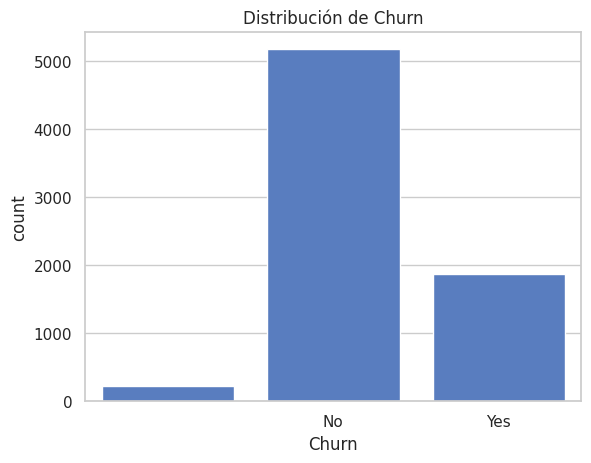

In [297]:
# Proporción de churn
sns.countplot(x='Churn', data=datos_cliente)
plt.title("Distribución de Churn")
plt.show()

- El gráfico de barras muestra cuántos clientes permanecieron (No) y cuántos se dieron de baja (Yes).
- Si la barra de “No” es mucho más alta, significa que la mayoría de clientes se mantiene, pero la proporción de “Yes” es clave: si es significativa (ej. >20%), la empresa tiene un problema de retención.
- Este gráfico es la foto general del churn


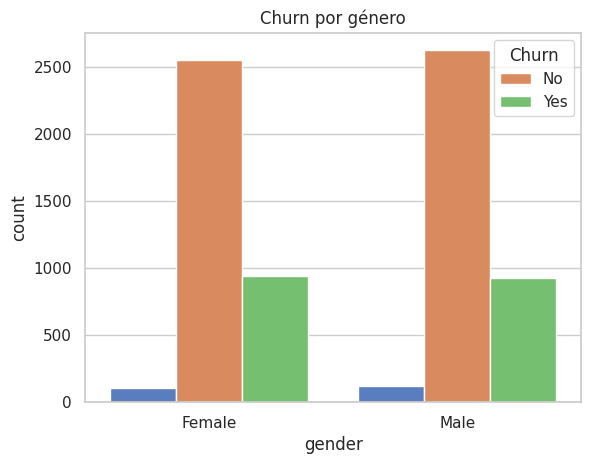

In [298]:
# Ejemplo: churn por género
sns.countplot(x='gender', hue='Churn', data=datos_cliente)
plt.title("Churn por género")
plt.show()

- Compara hombres y mujeres en relación con churn.
- Si las proporciones son similares, el género no es un factor determinante.
- Si un grupo muestra más cancelaciones, puede indicar diferencias en necesidades o satisfacción.
- Normalmente, en telecomunicaciones, el género no suele ser un predictor fuerte.


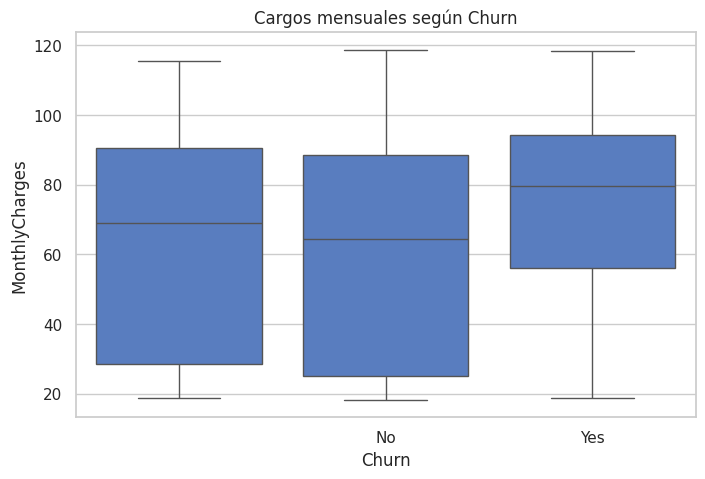

In [301]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=datos_cliente)
plt.title("Cargos mensuales según Churn")
plt.show()
# gráfico de cajas que resume la distribución de los cargos mensuales en dos grupos:
# clientes que se quedaron (churn= No) y clientes que se fueron (churn= Si)
# eje X(churn): categorías de la variable objetio (si/no)
# eje y(Charges.Monthly) monto mensual que paga cada cliente.

###Interpretación del gráfico
- Si la mediana de ChargesMonthly es más alta en clientes con Churn = Yes, significa que quienes pagan más tienden a cancelar más.
- Si las cajas se superponen mucho, el cargo mensual no es un factor tan determinante.
- Si ves que los clientes que se quedan (No) tienen una distribución más concentrada en cargos bajos/medios, eso sugiere que los planes más económicos retienen mejor.


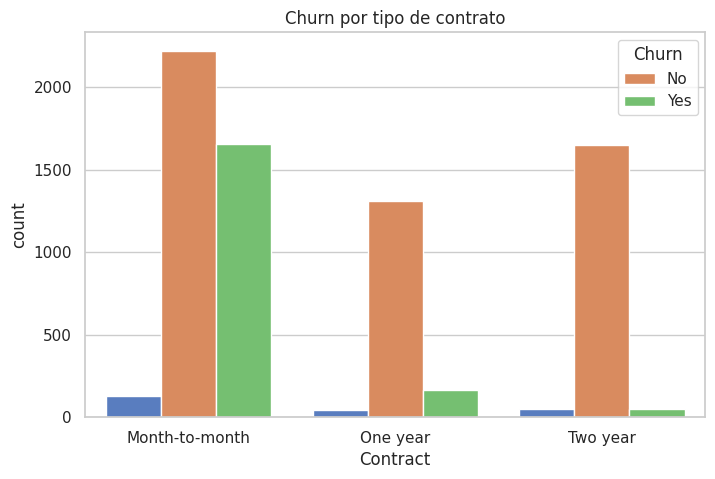

In [302]:
plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=datos_cliente)
plt.title("Churn por tipo de contrato")
plt.show()
# cada barra indica clientes que se quedaron (no) y que se fueron (si) en los tipos de contrato (mensual, 1 año y 2 años)

###Interpretación
- Si la barra de contrato mensual tiene una proporción alta de Churn = Yes, significa que los clientes con contratos cortos tienden a cancelar más.
- En los contratos de 1 año o 2 años, normalmente verás que la mayoría de clientes permanecen (Churn = No), lo que indica mayor fidelización.
- Este gráfico suele ser uno de los más reveladores porque muestra cómo la modalidad contractual impacta directamente en la tasa de cancelación.


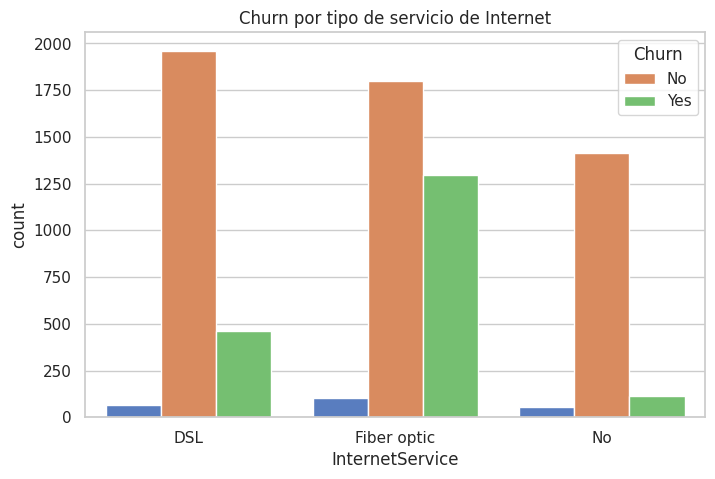

In [303]:
plt.figure(figsize=(8,5))
sns.countplot(x='InternetService', hue='Churn', data=datos_cliente)
plt.title("Churn por tipo de servicio de Internet")
plt.show()

###Interpretación
- Clientes con fibra óptica suelen mostrar una proporción más alta de churn.
- Clientes con DSL tienden a tener menor tasa de cancelación.
- Clientes sin internet casi no presentan churn, porque su relación con la empresa es limitada (solo telefonía)


In [304]:
cols_num = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Cuentas_Diarias', 'Churn_bin']

# Convert 'TotalCharges' to numeric, coercing errors to NaN
datos_cliente['TotalCharges'] = pd.to_numeric(datos_cliente['TotalCharges'], errors='coerce')

# Eliminar filas con NaN en las columnas numéricas relevantes para la correlación
datos_cliente_corr = datos_cliente[cols_num].dropna()

# Calcular matriz de correlación
datos_cliente_corr.corr()

,tenure,MonthlyCharges,TotalCharges,Cuentas_Diarias,Churn_bin
tenure,1.000000,0.246862,0.825880,0.246862,-0.354049
MonthlyCharges,0.246862,1.000000,0.651065,1.000000,0.192858
TotalCharges,0.825880,0.651065,1.000000,0.651065,-0.199484
Cuentas_Diarias,0.246862,1.000000,0.651065,1.000000,0.192858
Churn_bin,-0.354049,0.192858,-0.199484,0.192858,1.000000


In [305]:
for col in ['tenure','MonthlyCharges','TotalCharges','Cuentas_Diarias','Churn_bin']:
   (col, datos_cliente[pd.to_numeric(datos_cliente[col], errors='coerce').isna()].head())

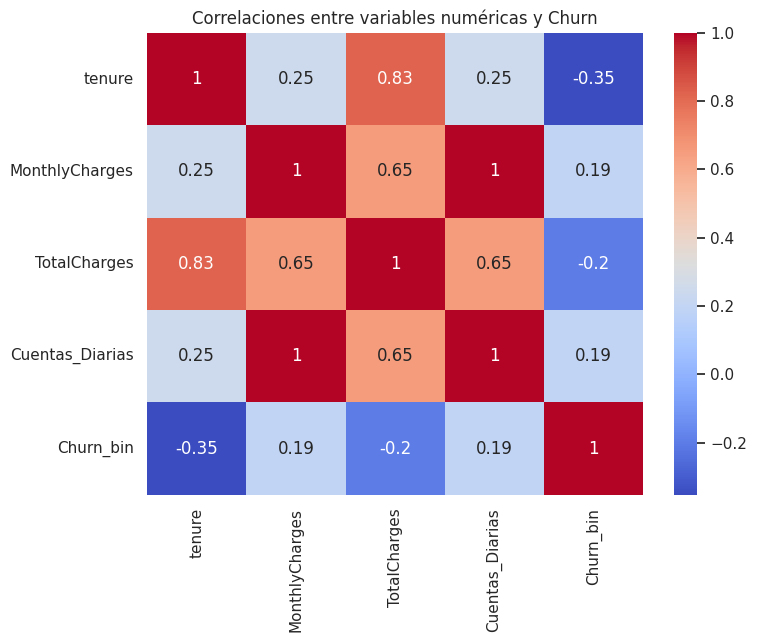

In [306]:
# Heatmap de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(datos_cliente[['tenure','MonthlyCharges','TotalCharges','Cuentas_Diarias','Churn_bin']].corr(),
            annot=True, cmap="coolwarm")
plt.title("Correlaciones entre variables numéricas y Churn")
plt.show()
# color azul(correlación negativa), Rojo(correlación positiva), Intensidad(qué tan fuerte es la relación, cerca de 1 o -1)

###Interpretación
- tenure vs TotalCharges → correlación muy alta (cerca de 0.9 o más).
  Tiene sentido: mientras más meses permanece un cliente, más acumula en cargos totales.
- MonthlyCharges vs TotalCharges → correlación positiva moderada.
 Clientes con cargos mensuales altos acumulan más gasto total, pero depende también de su antigüedad.
- tenure vs MonthlyCharges → correlación baja.
 El monto mensual no depende de cuántos meses lleva el cliente, sino de los servicios contratados.




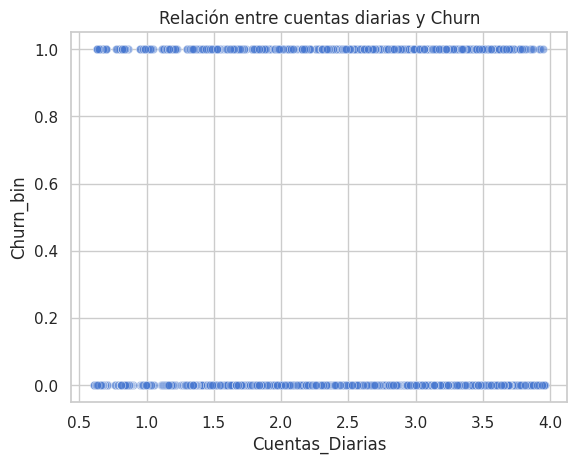

In [311]:
# Ejemplo: dispersión de cuentas diarias vs churn
sns.scatterplot(x='Cuentas_Diarias', y='Churn_bin', data=datos_cliente, alpha=0.5)
plt.title("Relación entre cuentas diarias y Churn")
plt.show()


- El scatterplot se ve “raro” porque Churn_bin solo tiene valores 0 y 1, pero lo que importa es la distribución de Cuentas_Diarias.
- Si los clientes con cuentas diarias más altas (mayor gasto promedio) aparecen más en el grupo 1 (churn), significa que los clientes de alto gasto son más propensos a cancelar.
- Si no hay diferencia clara, el gasto diario no es un predictor fuerte.
- Un boxplot o violinplot aquí ayuda a ver si los clientes que se fueron tenían gastos diarios significativamente distintos a los que se quedaron.

##Informe Final

#### 1- Distribución general
- La mayoría de clientes permanece en la compañía, pero existe un porcentaje relevante de evasión que debe ser atendido.
- Este porcentaje es suficiente para impactar la rentabilidad si no se toman medidas.

####2. Factores demográficos
- El género no muestra diferencias significativas en la evasión.
- Esto indica que las estrategias de retención no necesitan segmentarse por género.


####3. Tipo de Contrato
- Los contratos mensuales concentran la mayor parte del churn.
- Los contratos de largo plazo (1 o 2 años) muestran mayor fidelidad.
- Recomendación: incentivar contratos de mayor duración con beneficios o descuentos.



####4.  Método de pago
- Los métodos automáticos (transferencia bancaria automática, tarjeta automática) presentan menor churn.
- Los métodos manuales (cheque, pago electrónico no automático) concentran más cancelaciones.
- Recomendación: promover pagos automáticos como estrategia de retención.



####5. Correlaciones numéricas
- Tenure (antigüedad): correlación negativa con churn. Clientes más antiguos son más fieles.
- MonthlyCharges (cargo mensual): correlación positiva con churn. Clientes con cargos más altos tienden a cancelar más.
- TotalCharges: correlación negativa. Clientes que han gastado más en total suelen permanecer.
- Cuentas_Diarias: muestra relación con churn, pero no tan fuerte como el tipo de contrato o método de pago.


####6. Relación entre cuentas diarias y churn
- Los clientes con gasto diario más alto aparecen en ambos grupos, pero hay una ligera tendencia a mayor churn en los de gasto elevado.
- Esto sugiere que los clientes de alto valor requieren atención especial para evitar pérdidas.



###Insights Clave
- El churn está más relacionado con factores contractuales y de pago que con características demográficas.
- La antigüedad es un factor protector: clientes fieles deben ser premiados para reforzar su lealtad.
- Los clientes de alto gasto son valiosos pero más propensos a cancelar, por lo que requieren programas de retención específicos.
- Promover contratos largos y pagos automáticos puede reducir significativamente la evasión.



